### 1. Import libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


### 2. Load the dataset

In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

### 3. Normalize and reshape the images

In [ ]:
# Normalize and reshape the images
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


### 4. Model Definition



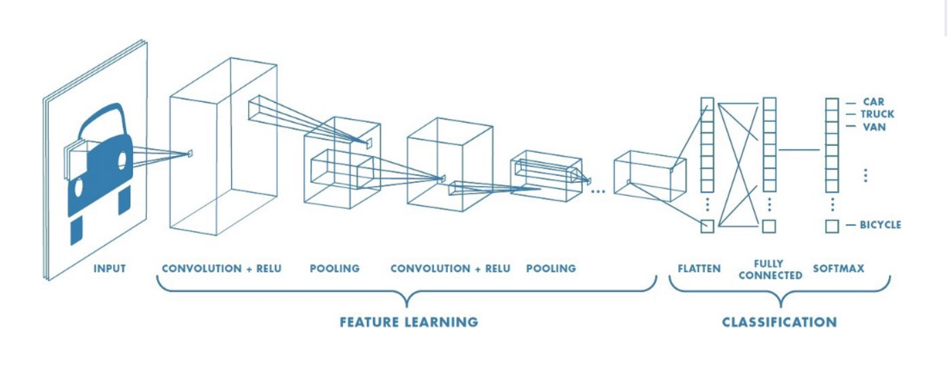

In [ ]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    # First convolutional layer with 32 filters and ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer with 64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the feature maps into a 1D vector for the dense layers
    layers.Flatten(),
    # Fully connected layer with 64 neurons
    layers.Dense(64, activation='relu'),
    # Output layer with 10 neurons (for 10 classes)
    layers.Dense(10, activation='softmax')
])


### 5. Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### 6. Train the model

In [ ]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.9027 - loss: 0.3281 - val_accuracy: 0.9782 - val_loss: 0.0680
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 29ms/step - accuracy: 0.9847 - loss: 0.0489 - val_accuracy: 0.9876 - val_loss: 0.0352
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9902 - loss: 0.0310 - val_accuracy: 0.9884 - val_loss: 0.0352
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9932 - loss: 0.0225 - val_accuracy: 0.9898 - val_loss: 0.0347
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9950 - loss: 0.0157 - val_accuracy: 0.9918 - val_loss: 0.0283


### 7. Test Accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 2s - 8ms/step - accuracy: 0.9918 - loss: 0.0283
Test accuracy: 0.9918000102043152


### 8. Visualize results

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


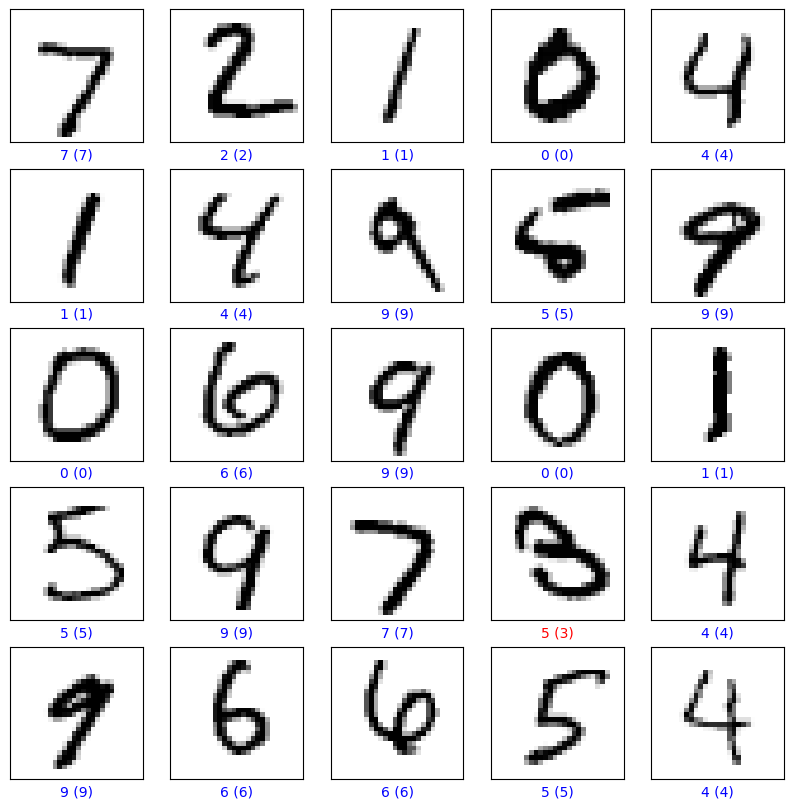

In [ ]:
import numpy as np
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)

predictions = model.predict(test_images)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plot_image(i, predictions[i], test_labels, test_images)
plt.show()


### 9. Visualize accuracy and loss

313/313 - 2s - 8ms/step - accuracy: 0.9918 - loss: 0.0283
The accuracy is 99.18% and the loss is 0.0283.


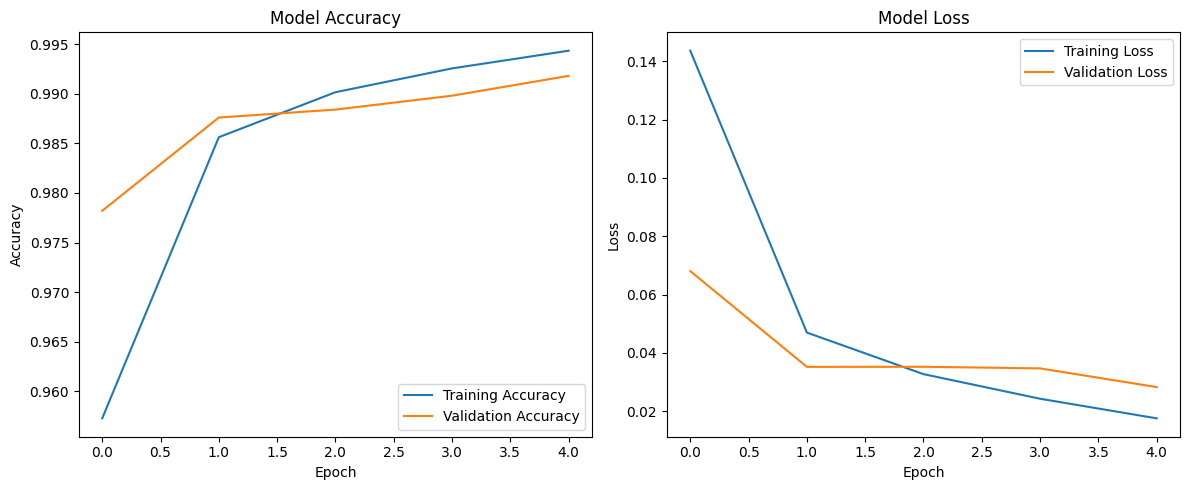

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()
    # Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Print the accuracy and loss in a formatted statement
print(f"The accuracy is {test_acc * 100:.2f}% and the loss is {test_loss:.4f}.")

# Plot the training history
plot_training_history(history)
